In [1]:
import pandas as pd

In [2]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

In [5]:
import numpy as np

In [6]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))*(data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [7]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [8]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [9]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [10]:
data_ads["corr2"] = (data_ads['Sales'] - np.mean(data_ads['Sales']))**2

In [11]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [12]:
corr_pearson = sum(data_ads['corrn'])/np.sqrt(sum(data_ads['corr1']) * sum(data_ads['corr2']))

In [13]:
corr_pearson

0.782224424861606

In [14]:
def corr_coef(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))*(df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df['corrn'])/np.sqrt(sum(df['corr1']) * sum(df['corr2']))
    return corr_p

In [15]:
corr_coef(data_ads,"TV","Sales")

0.782224424861606

In [19]:
cols = ['TV', 'Radio', 'Newspaper', 'Sales']
cols

['TV', 'Radio', 'Newspaper', 'Sales']

In [20]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + " : "+str(corr_coef(data_ads,x,y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


In [21]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas del producto')

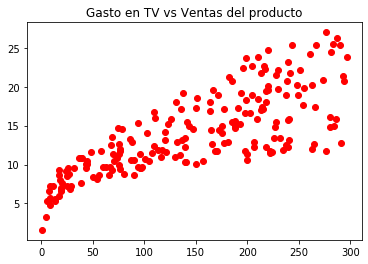

In [23]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del producto')

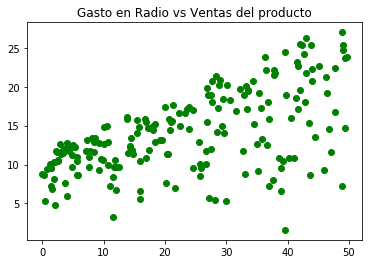

In [26]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del producto")

Text(0.5, 1.0, 'Gasto en Periodico vs Ventas del producto')

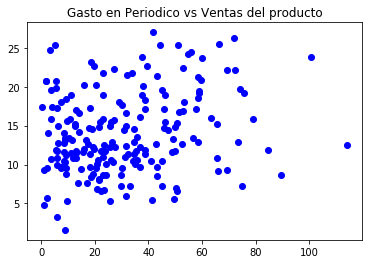

In [27]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periodico vs Ventas del producto")

In [29]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


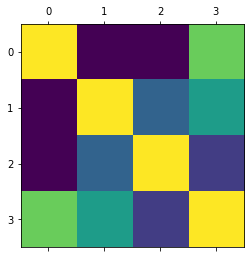

In [30]:
plt.matshow(data_ads.corr())